# DSCI 6003 Skills Test 2

## Short-Form Answers - Choose four
#### None of these should take more than 10 minutes to answer.

1) Describe in your own words the Hypothesis of SVM classifiers and why this provides them a special advantage, with regards to imbalanced classes.

#Answer1)

Hypothesis of SVM is we want to find a hyperplane which separates the two class.
Variables can be classified in terms of a plane separating them.
We seek to produce a hyperplane that maximizes the distance between a training example of
any given class and itself.
Equation of plane is given as 

$$ |\beta_0 + \textbf{$\beta^{T}$}\textbf{x}| = 1 $$

in the above equation x is the support vector.

SVM has a advantage in comparison to other classifiers in case of imbalanced class because in SVM we construct a
hyperplane to maximize the margin.(can be calles as soft margin).
Also only support vectors are used for classification and many majority sample far from the decision boundary can
be removed.




2) Write the pseudocode for an SVM classifier, in both the fit and predict phases. You don't need to write the convex optimization, just what comes out of it. 

3) Why is it usually a good idea to scale data before using it to train a SVM?

In [ ]:
#Answer3)
It is better to scale the data before using it to train because it improves the performance of the SVM Model
and its accuracy.
Scaling is important in case of variables with large variances. 
The main advantage of scaling is to avoid attributes in greater numeric ranges 
dominating those in smaller numeric ranges.
Another advantage is to avoid numerical diculties during the 
calculation.

4) Why do we normally use "soft margins" in a SVM? How do we implement them? What hyperparameter do we use in SVMs to control the soft margins? How does it work? What would happen with "hard margins"?

5) Describe example use cases, weaknesses and strengths of multiclass SVMs. What types of problems do we use these for?

6) What is the "trick" in the kernel trick? What do we use the kernel trick for?

In [ ]:
#Answer6)

Kernel trick is basically transformation of input data into higher dimension
which helps in identifying the linear separation of data.

Many times we can have non linear boundaries separating the different labels or classes.
Now kernel trick is done to get the linear boundary or a hyperplane to separate different classes.
Applying kernel trick we can increase the dimension of the data set and then get a hyperplane as the decision
boundary.

7) Suppose we have an SVC fully trained on one set of data and then we add more training points afterwards. The additional training points include bias towards one class but have higher variance than either. What happens to the support vectors when we refit on the new points? What happens to the precision and accuracy of the classifier? There is a related question below that might make this answer easier.

8)  Describe Bagging and give 2 example use cases for bagging with a standard classifier (not Random Forests).

9) Write the pseudocode for the construction of a decision tree in both the fit and predict phases.

10) What are the Gini index and Entropy used to measure in the construction of decision trees? By this, we mean what is the overall quanitity that we measure with these measures.

In [ ]:
#Answer10)

Gini Index: The Gini impurity is another way of measuring which split is the best.
    It's a measure of this probability:
    
    Take a random element from the set
    Label it randomly according to the distribution of labels in the set
    What is the probability that it is labeled incorrectly.

    
Entropy : It is a measure of disorder,uncertainity or surprise.When we create decision 
    tree we try to create the split which 
    minimizes the entropy.It is one of the criteria to split the decision tree node.
    If a set has same label then it has low entropy while if it has a mix of label then high entropy.
    
If the split is good then model has a better predictive power.

We are measuring the information gain

In order to pick which feature to split on, 
we need a way of measuring how good the split is. This is what information gain is used for and measured by entropy 
and gini impurity.

## Scripting - Choose one
#### Should take about an hour - make sure to reuse and cite the scikit code!!

A) Write a simulation of what happens in 7). You will want to generate points with the make_classification method (or some other method if you prefer) in scikit. For every cycle, add a small number of additional points to the input data that come from a slightly different distribution (use slightly different parameters). Use [the starting code here](http://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html) for plots of the decision function and support vectors.

B) Given [the starter code for a single regression](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html), create a bagged regression for the first feature of the diabetes dataset. Make sure to keep a train-test split. Maximize the accuracy and precision of your method using all tools you have been given. You must validate your results. You may use anything you can find in scikit-learn to make this faster. 

## Coding
#### Should take about an hour

The decision tree solution code is in the test folder. Use this to produce a subclass of BinaryTree called kExtremeTree. You will override the `_choose_split_index` function to select k randomly selected features (so this would be the split index i in `_make_split`) instead of going over the entire matrix, and of these k randomly selected features, pick the best split among the k features (instead of the best split among every possible feature). Make sure to include k as a user-defined input. If k is larger than the number of features, make sure to raise an exception. 

If you have pruning finished, you should definitely include a pruning method in with your trees.

Now create a random forest subclass called kExtremeForest using these trees and produce metrics for performance. How does it perform?

## Data Science 
#### Time will vary 

If you can solve the below problem, you may start calling yourself a data scientist. :)

Using the below analysis as a starting point, produce a prediction for the age of abalone based on their sex and shell measurements 1-5. You may use any classifier or preprocessing method you know. You may grid search to optimize parameters. Make sure to validate your model and substantiate your reasoning.

If you cannot produce a useful classifier, write a short report as to why.

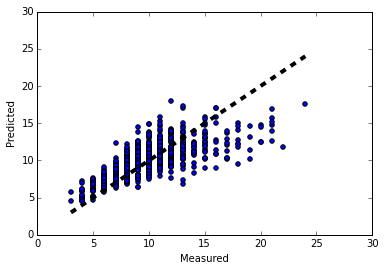

In [78]:
%matplotlib inline
import pandas as pd
import sklearn.decomposition as skd
from sklearn import svm
from sklearn import metrics
from sklearn.cross_validation import train_test_split
import sklearn.preprocessing as pps


df = pd.read_csv('./data/abalone.csv')

sex = df['sex'].values
age = df['age'].values
raw_measurements = df[['1','2','3','4','5']]
males = df[df['sex']=='M']
females = df[df['sex']=='F']

raw_measurements.head

X = pps.scale(raw_measurements)
y = age

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn import datasets
from sklearn import linear_model
import matplotlib.pyplot as plt

model = linear_model.LinearRegression()
boston = datasets.load_boston()
y = boston.target


# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validated:
clf = model.fit(X_train, y_train)
predicted = clf.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_test, predicted)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()